In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_data = pd.read_csv('sentrev.csv')

In [6]:
#Get shape of data
print(f'The data has {hotel_data.shape[0]} rows and {hotel_data.shape[1]} columns (i.e features)')

The data has 12731 rows and 14 columns (i.e features)


In [8]:
#Get the features of the data set
hotel_data.columns

Index(['name', 'address', 'facilities', 'desc', 'price', 'state', 'reviewer',
       'rating', 'review', 'review day', 'review month', 'review year',
       'sentiment', 'sentiment score'],
      dtype='object')

In [10]:
#View some samples of the data
hotel_data.sample(3)

,name,address,facilities,desc,price,state,reviewer,rating,review,review day,review month,review year,sentiment,sentiment score
11142,hotel ibis lagos ikeja,23 toyin street ikeja lagos,"Restaurant, Bar/Lounge, Security, Wireless Int...",Hotel Ibis is a 3-Star hotel located at 23 ...,32000.0,lagos,Mr,10.0,It had a very good stay at the hotel. All the ...,7.0,November,2017.0,Positive,7.0
314,la pour hotel,plot 794 okonjo-iweala way utako district opp ...,"Restaurant, Bar/Lounge, Security, Air Conditio...",When guests look for a classy yet pocket-frien...,0.0,abuja,Ifeoma,5.2,It is just a 50% - 60% hotel. I had to complai...,20.0,December,2019.0,Negative,-2.0
5167,handsworth hotel limited,7/8 young arabamen street farm bus-stop sango...,"Restaurant, Bar/Lounge, Security, 24 Electrici...",Handsworth Hotel Limited is a one-stop destina...,20000.0,lagos,Mr,8.8,"I was impressed with their service, the front ...",8.0,February,2017.0,Positive,18.0


In [11]:
#Check for null values
hotel_data.isna().sum()

name               0
address            0
facilities         0
desc               0
price              0
state              0
reviewer           0
rating             0
review             0
review day         0
review month       0
review year        0
sentiment          0
sentiment score    0
dtype: int64

In [18]:
#Get states captured in the dataset
states = hotel_data.state.unique()
print(f"There are {len(states)} states in the dataset. namely:\n {list(map(str.capitalize, sorted(states)))}")

There are 31 states in the dataset. namely:
 ['Abia', 'Abuja', 'Adamawa', 'Akwa ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Cross river', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Gombe', 'Imo', 'Kaduna', 'Kano', 'Katsina', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto']


In [26]:
#Number of hotels
hotel_names = hotel_data.name.unique()
hotel_names[:20]

array(['de santos hotel, awka', 'grand ibro hotel', 'midas hotel',
       'american university hotel (aun)',
       'bel classcia (former durban suites)', "golphin's suites",
       'beverly hills resort', 'benidon hotel', 'rapha hotels ltd',
       'rockview hotel royale', 'hawthorn suites by wyndham',
       'vine apartment', 'brickland residence', 'allen suites',
       'canopy hotels', 'sheer luxury apartments',
       'summerset continental hotel', 'crystal palace hotel',
       'hotel interconnect', 'la pour hotel'], dtype=object)

In [31]:
hotel_data['price'] = hotel_data['price'].apply(int)

In [47]:
def impute_price(x):
    if x == 0:
        p = int(hotel_data.price.mean())
    else:
        p = x
    return p

hotel_data['price'] = hotel_data.price.apply(impute_price)

In [369]:
#Period of reveiws
hotel_data['review year'] = hotel_data['review year'].apply(int)
review_years = sorted(hotel_data['review year'].unique())
review_years

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [65]:
#number of hotel per state
hotel_per_state = dict(list(hotel_data.groupby('state')['name']))
for state in list(hotel_per_state.keys()):
    hotel_per_state[state] = len(set(hotel_per_state[state]))

In [94]:
hotel_per_state = dict(sorted(hotel_per_state.items(), key=lambda x: x[1], reverse=True))

In [183]:
list(hotel_per_state.values())[::-1][:10]

[1, 1, 1, 2, 2, 2, 3, 3, 4, 4]

Text(0.5, 1.0, 'Top 10 states with the lowest number of hotels')

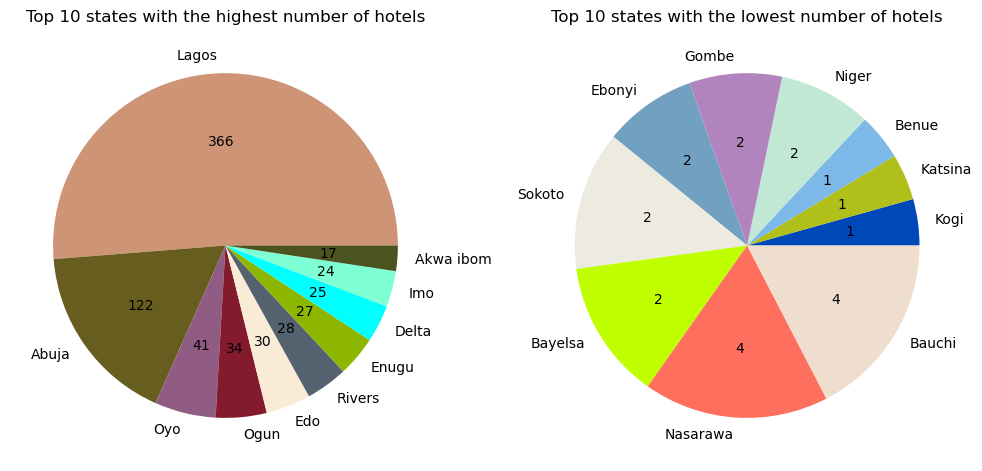

In [355]:
#Pie chart of the top ten states with the highest number of hotels
colors = ['#CD9575','#665D1E','#915C83','#841B2D','#FAEBD7','#54626F','#8DB600','#00FFFF',
          '#7FFFD4','#4B5320']
color1 = ['#0048BA','#B0BF1A','#7CB9E8','#C0E8D5','#B284BE','#72A0C1','#EDEAE0','#BFFF00',
          '#FE6F5E','#EFDECD']

top_ten_states = list(map(str.capitalize, list(hotel_per_state.keys())[:10]))
hotel_count1 = list(hotel_per_state.values())[:10]

low_ten_states = list(map(str.capitalize, list(hotel_per_state.keys())[::-1][:10]))
hotel_count2 = list(hotel_per_state.values())[::-1][:10]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7), subplot_kw=dict(aspect="equal"))
def make_val(all_values):
    def auto_pct(pct):
        val = int((pct * sum(all_values))/100)
        return f"{val}"
    return auto_pct

wedges, texts, autotext = ax1.pie(x=hotel_count1, labels=top_ten_states, colors=colors, autopct=make_val(hotel_count1))
#for text in texts:
    #text.set_color('white')
    
wedges2, texts2, autotext2 = ax2.pie(x=hotel_count2, labels=low_ten_states, colors=color1, autopct=make_val(hotel_count2))
#for text in texts2:
    #text.set_color('white')

plt.tight_layout()

ax1.set_title('Top 10 states with the highest number of hotels')
ax2.set_title('Top 10 states with the lowest number of hotels')
#plt.setp((ax1.title,ax2.title), color='w')

#ax.legend(wedges, hotel_count,
  #        title="Hotel count per state",
   #       loc="center left",
    #      bbox_to_anchor=(1, 0, 0.5, 1))

In [271]:
#Hotel price
hotel_price = dict(list(hotel_data.groupby('name')['price']))
for name in list(hotel_price.keys()):
    hotel_price[name] = list(hotel_price[name])[0]

In [272]:
#graph of top 10 hotels based on price 23878
hotel_price = dict(sorted(hotel_price.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Top 15 Hotels by Price')

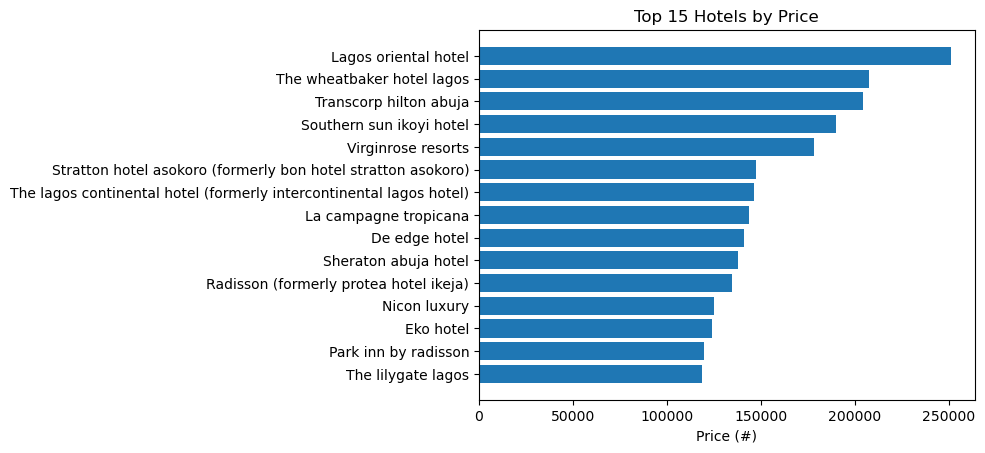

In [296]:
#Top 15 Hotels by Price
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

#data
top_15_hotels_p = list(map(str.capitalize, tuple(hotel_price.keys())[:15]))
y_pos = np.arange(len(top_15_hotels_p))
top_15_price = list(hotel_price.values())[:15]
error = np.random.rand(len(top_15_hotels_p))

ax.barh(y_pos, top_15_price, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_15_hotels_p)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price (#)')
ax.set_title('Top 15 Hotels by Price')

Text(0.5, 1.0, 'Least 15 hotels by Price')

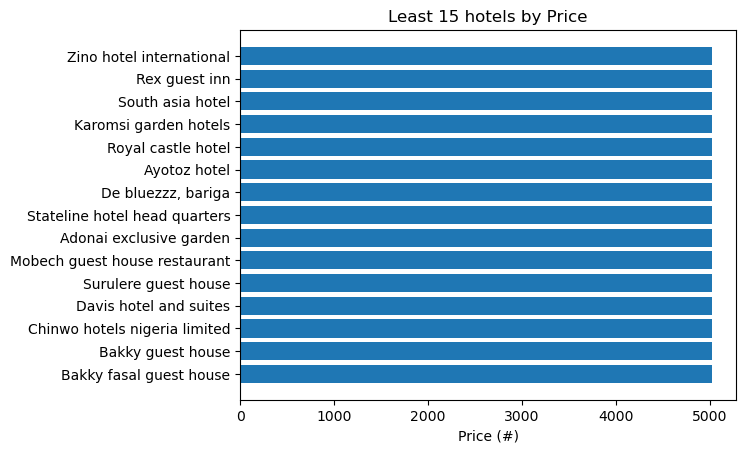

In [297]:
#Least 15 Hotels by Price 
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

low_15_hotels_p = list(map(str.capitalize, list(hotel_price.keys())[::-1][:15])) 
y_pos = np.arange(len(low_15_hotels_p))
low_15_price = list(hotel_price.values())[::-1][15]
error = np.random.rand(len(low_15_hotels_p))

ax.barh(y_pos, low_15_price, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(low_15_hotels_p)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price (#)')
ax.set_title('Least 15 hotels by Price')

In [287]:
#Top hotels by review ratings
hotel_by_ratings = dict(hotel_data.groupby('name')['rating'].mean())
hotel_by_ratings = dict(sorted(hotel_by_ratings.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Top 15 Hotels by User Ratings')

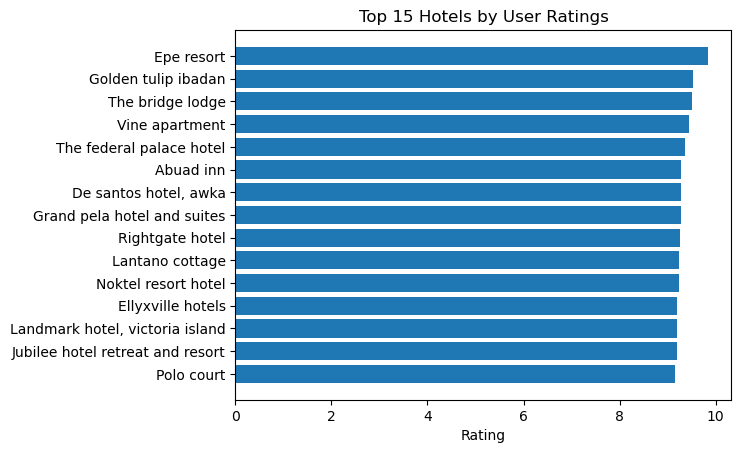

In [298]:
#Top 15 hotels by User Ratings
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

top_15_ratings = list(map(str.capitalize, list(hotel_by_ratings.keys())[:15])) 
y_pos = np.arange(len(top_15_ratings))
top_15_rates = list(hotel_by_ratings.values())[:15]
#error = np.random.rand(len(top_15_rates))

ax.barh(y_pos, top_15_rates, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_15_ratings)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rating')
ax.set_title('Top 15 Hotels by User Ratings')

Text(0.5, 1.0, 'Least 15 Hotels by User Ratings')

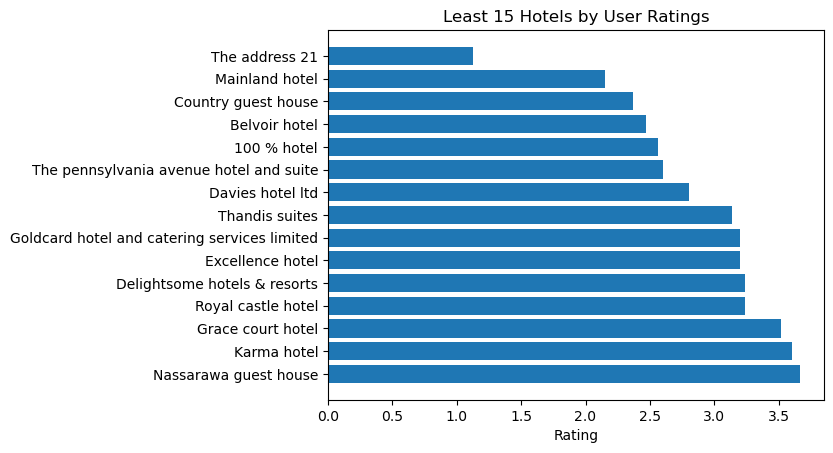

In [359]:
#Least 15 hotels by User Ratings
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

least_15_ratings = list(map(str.capitalize, list(hotel_by_ratings.keys())[::-1][:15])) 
y_pos = np.arange(len(top_15_ratings))
least_15_rates = list(hotel_by_ratings.values())[::-1][:15]
#error = np.random.rand(len(top_15_rates))

ax.barh(y_pos, least_15_rates, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(least_15_ratings)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rating')
ax.set_title('Least 15 Hotels by User Ratings')

In [303]:
#Hotel by Review
hotels_reviews = dict(hotel_data.groupby('name')['review'].count())
hotel_reviews = dict(sorted(hotels_reviews.items(), key=lambda x:x[1], reverse=True))

Text(0.5, 1.0, 'Top 10 Hotels by Number of Reviews')

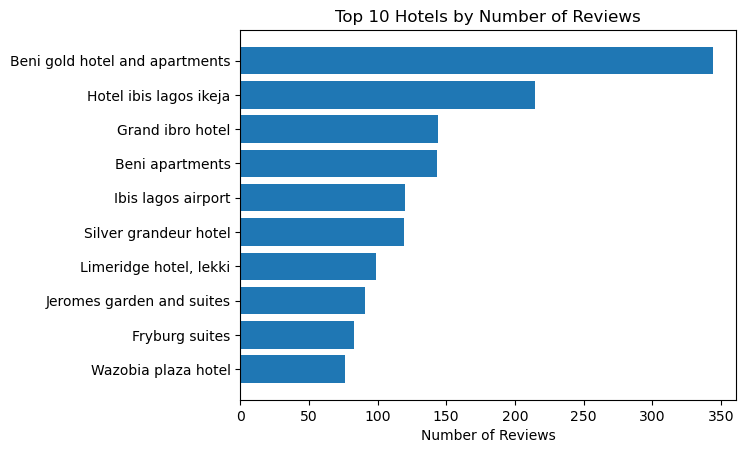

In [306]:
#Top 10 hotels with highest reviews
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

top_10_reviews = list(map(str.capitalize, list(hotel_reviews.keys())[:10])) 
y_pos = np.arange(len(top_10_reviews))
top_10_review = list(hotel_reviews.values())[:10]
#error = np.random.rand(len(top_15_rates))

ax.barh(y_pos, top_10_review, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_reviews)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Reviews')
ax.set_title('Top 10 Hotels by Number of Reviews')

Text(0.5, 1.0, 'Least 10 Hotels by Number of Reviews')

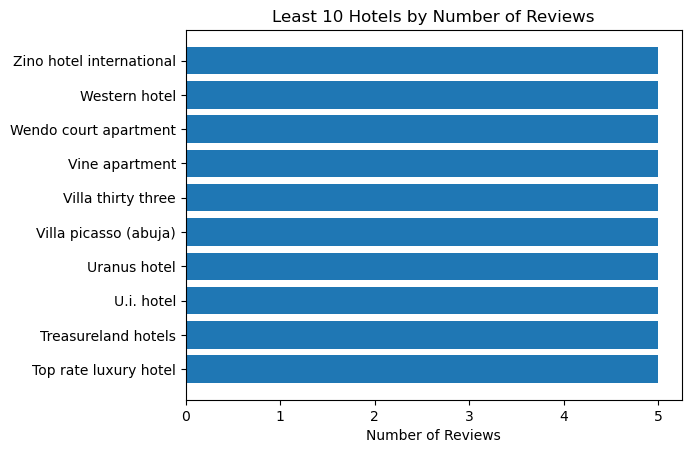

In [310]:
#Least 10 hotels with highest reviews
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

least_10_reviews = list(map(str.capitalize, list(hotel_reviews.keys())[::-1][:10])) 
y_pos = np.arange(len(least_10_reviews))
least_10_review = list(hotel_reviews.values())[::-1][:10]
#error = np.random.rand(len(top_15_rates))

ax.barh(y_pos, least_10_review, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(least_10_reviews)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Reviews')
ax.set_title('Least 10 Hotels by Number of Reviews')

<AxesSubplot:>

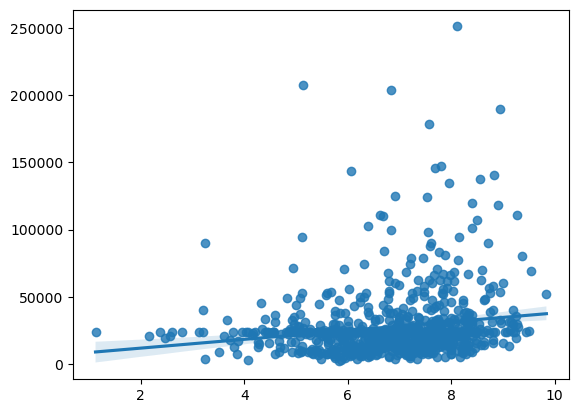

In [326]:
#Relationship between price and rating
sns.regplot(x=list(dict(sorted(hotel_by_ratings.items())).values()), y=list(dict(sorted(hotel_price.items())).values()))

In [366]:
hotel_data['review year'] = hotel_data['review year'].apply(lambda x: int(str(x).replace('1970', '2013')))

In [367]:
review_year_dict = dict(hotel_data.groupby('review year')['review'].count())

Text(0.5, 1.0, 'Number of Reviews per Year')

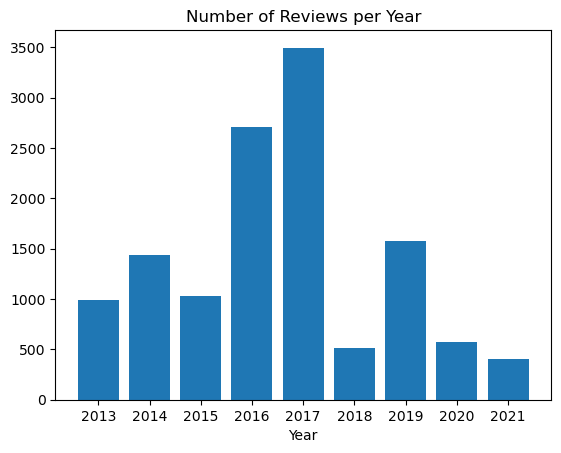

In [368]:
#Number of reviews by year
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

review_year = list(review_year_dict.keys()) 
x_pos = np.arange(len(review_year))
number_of_review= list(review_year_dict.values())
#error = np.random.rand(len(top_15_rates))

ax.bar(x_pos, number_of_review, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(review_year)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Year')
ax.set_title('Number of Reviews per Year')

In [344]:
recommend_data = pd.read_csv('hotel_summary.csv')

In [345]:
recommend_data.shape

(868, 8)

In [346]:
recommend_data.sample(5)

,Hotel_name,Address,State,Positive_review,Facilities,Description,Price,Hotel_summary
838,villa view hotels ltd,4 udoinyang street off park road itam junction,akwa ibom,room comfortable spacious ac environment clean...,"Restaurant, Bar/Lounge, Security, Wired Intern...",Villa View Hotels Ltd is a 2-Star hotel loca...,9650,deluxe cab offer water box polite fix slight j...
558,nordy hotels,no 15 inuwa wada crescent off tos benson cresc...,abuja,enjoy stay hotel smooth check check environmen...,"Restaurant, Bar/Lounge, Adequate Parking, DSTV...","Idealy Situated on Utako Distri ct, Abuja's bu...",0,instead lavish offer water polite environment ...
532,moore road social,28 moore road off university road,lagos,stay hotel worth good stay structure look like...,"Restaurant, Bar/Lounge, Security, Air Conditio...",Moore Road Social Guest House is located at 2...,7000,budget price arrange water environment securit...
483,"limeridge hotel, lekki",plot 10 chevron drive,lagos,stay beautiful thank hotels.ng assistance good...,"Restaurant, Bar/Lounge, Security, Wireless Int...",Limeridge Hotel Lekki is an affordable 3-Star...,41785,arrange water depend positive heater review th...
420,k s motels limited,queen elizabeth ii roadorita-mefa p.o box 2084,oyo,need rest get place amazing room feel nice per...,"Proximity to Main Road, Restaurant, Security,...","Located on Queen Elizabeth II road, Orita-Mefa...",12200,price offer priority environment excellent sec...


In [347]:
from wordcloud import STOPWORDS, WordCloud
import imageio

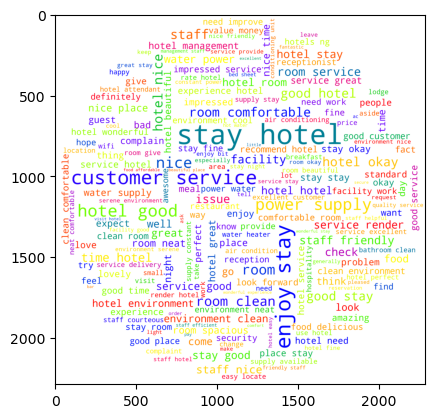

In [350]:
#Positive review word cloud
text = " ".join(list(recommend_data.Positive_review))
mask_image = imageio.imread('mask_circle.png')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(colormap='prism', mask=mask_image, stopwords=stopwords, background_color='white')
wordcloud = wordcloud.generate(text)
#wordcloud = wordcloud.to_file('posreviews.png')
plt.imshow(wordcloud)

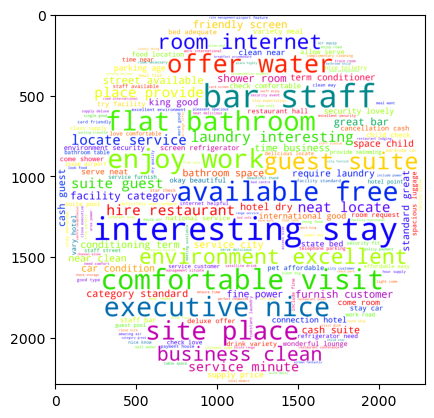

In [351]:
#Hotel summary wordcloud
text = " ".join(list(recommend_data.Hotel_summary))
mask_image = imageio.imread('mask_circle.png')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(colormap='prism', mask=mask_image, stopwords=stopwords, background_color='white')
wordcloud = wordcloud.generate(text)
#wordcloud = wordcloud.to_file('posreviews.png')
plt.imshow(wordcloud)

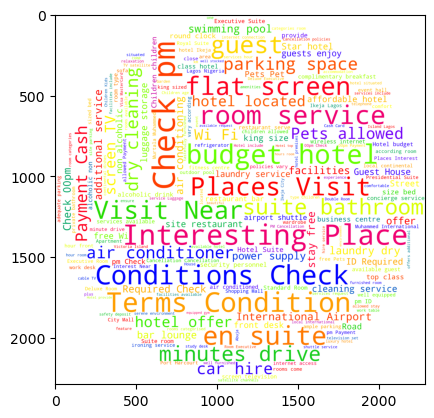

In [370]:
#Hotel summary wordcloud
text = " ".join(list(recommend_data.Description))
mask_image = imageio.imread('mask_circle.png')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(colormap='prism', mask=mask_image, stopwords=stopwords, background_color='white')
wordcloud = wordcloud.generate(text)
#wordcloud = wordcloud.to_file('posreviews.png')
plt.imshow(wordcloud)